In [48]:
import fastparquet
import pandas as pd
import snscrape.modules.twitter as sntwitter
import datetime as dt
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [39]:
def get_tweets(concepto, start_date, end_date, max_tweets):

	scrap = sntwitter.TwitterSearchScraper(concepto + ' since:' + start_date + ' until:' + end_date)

	tweets_list = {}

	for i, tweet in tqdm(enumerate(scrap.get_items()), total=max_tweets):
		
		tweets_list[i] = {
			'date': tweet.date,
			'id': tweet.id,
			'rawContent': tweet.rawContent,
			'replyCount': tweet.replyCount,
			'retweetCount': tweet.retweetCount,
			'likeCount': tweet.likeCount,
			'quoteCount': tweet.quoteCount,
			'viewCount': tweet.viewCount,
			'lang': tweet.lang,
			'coordinates': tweet.coordinates,
			'place': tweet.place,
			'hashtags': tweet.hashtags,
			'mentionedUsers': tweet.mentionedUsers,
			'user_id': tweet.user.id,
			'user_name': tweet.user.username,
			'user_renderedDescription': tweet.user.renderedDescription,
			'user_join_date': tweet.user.created,
			'user_followers': tweet.user.followersCount,
			'user_location': tweet.user.location,
			'user_verified': tweet.user.verified,
			'inReplyToTweetId': tweet.inReplyToTweetId
		}

		if i > max_tweets:
			break

	df = pd.DataFrame.from_dict(tweets_list, orient='index')
	return df

In [80]:
dataset_mencion1 = get_tweets('convención constitucional', '2019-11-15', '2020-12-31', 1_000)
dataset_mencion1.head()

  0%|          | 0/1000 [00:00<?, ?it/s]

,date,id,rawContent,replyCount,retweetCount,likeCount,quoteCount,viewCount,lang,coordinates,...,hashtags,mentionedUsers,user_id,user_name,user_renderedDescription,user_join_date,user_followers,user_location,user_verified,inReplyToTweetId
0,2020-12-30 23:53:06+00:00,1344431346979106817,Hoy en @elmostrador el trabajo que está hacien...,0,0,0,0,None,es,None,...,None,"[https://twitter.com/elmostrador, https://twit...",2937932884,FParticipa,Centro de acción e ideas progresistas para la ...,2014-12-23 03:56:00+00:00,3569,,False,NaN
1,2020-12-30 23:50:10+00:00,1344430612007038976,Les comparto nota sobre mi precandidatura a la...,0,2,7,0,None,es,None,...,"[ConvencionConstitucional, Descentralizacion, ...",None,121844266,rburgospinto,Doctor en Historia @UCLHistory | profesor en e...,2010-03-10 19:41:45+00:00,1021,"Viña del Mar, Chile",False,NaN
2,2020-12-30 23:37:26+00:00,1344427406627639296,@GarinDiputado El #NuevoTrato trae a honorable...,0,0,5,0,None,es,None,...,"[NuevoTrato, NuevoTrato]",[https://twitter.com/GarinDiputado],1123684711447126016,LaDecadenteConB,"en deconstruccion constante,\nde la gloriosa g...",2019-05-01 20:24:47+00:00,4918,,False,1.344422e+18
3,2020-12-30 23:25:26+00:00,1344424386418323456,Representación de las comunidades LGTBI+ en #C...,0,0,0,0,None,es,None,...,"[ConvenciónConstitucional, independientes]",None,1341833066659115010,ceciechepascal,“Que Todes les Niñes tengan derecho a ser quie...,2020-12-23 19:49:13+00:00,97,"Valparaíso, Chile",False,NaN
4,2020-12-30 22:30:14+00:00,1344410496309596162,Para entusiasmarse con el 2021 💪: 25 voces fem...,5,7,11,1,None,es,None,...,None,None,86958006,thecliniccl,"#Reportajes, #Noticias, #Entrevistas, #Tertuli...",2009-11-02 14:58:20+00:00,2159567,Chile,True,NaN


In [ ]:
# dataset_mencion1.to_parquet('datasets/dataset_mencion1.parquet', index=False, engine='fastparquet', compression='gzip')

In [70]:
dataset_mencion1.to_csv('datasets/dataset_mencion1.parquet', index=False)

In [83]:
dataset_mencion1 = pd.read_csv('datasets/dataset_mencion1.csv')

In [101]:
dataset_mencion1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100002 entries, 0 to 100001
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   date                      100002 non-null  object 
 1   id                        100002 non-null  int64  
 2   rawContent                100002 non-null  object 
 3   replyCount                100002 non-null  int64  
 4   retweetCount              100002 non-null  int64  
 5   likeCount                 100002 non-null  int64  
 6   quoteCount                100002 non-null  int64  
 7   viewCount                 0 non-null       float64
 8   lang                      100002 non-null  object 
 9   coordinates               3324 non-null    object 
 10  place                     3324 non-null    object 
 11  hashtags                  63839 non-null   object 
 12  mentionedUsers            30988 non-null   object 
 13  user_id                   100002 non-null  i

In [89]:
dataset_mencion1.head()

,date,id,rawContent,replyCount,retweetCount,likeCount,quoteCount,viewCount,lang,coordinates,...,user_name,user_renderedDescription,user_join_date,user_followers,user_location,user_verified,inReplyToTweetId,date_day,date_month,sentiment
0,2022-09-03 23:36:16+00:00,1566208484160536576,15.1 millones de electores chilenos están obli...,3,10,37,1,NaN,es,NaN,...,FernanMartinez,Periodista y mánager de talento. Percepcionist...,2009-05-13 20:16:30+00:00,321175,Bogotá/Key Biscayne,True,NaN,2022-09-03,2022-09,0.0
1,2022-09-03 23:32:04+00:00,1566207427837628417,#Chile Acá podrán seguir todos los datos respe...,0,0,0,0,NaN,es,NaN,...,JanusNoticias,Noticias de Uruguay y el mundo. Comunicación r...,2022-05-06 00:08:36+00:00,772,NaN,False,NaN,2022-09-03,2022-09,0.0
2,2022-09-03 23:12:21+00:00,1566202468878503936,@Rodolfo62949483 @Dany41135077 De aprobar o no...,1,1,1,0,NaN,es,NaN,...,joseantoniogor,ANTICOMUNISTA 🇨🇱/Gay pero NO PROGRE ni del Col...,2022-07-05 21:03:56+00:00,13170,NaN,False,1.566200e+18,2022-09-03,2022-09,0.0
3,2022-09-03 23:07:47+00:00,1566201318741385216,@bdelamaza Que más se podía esperar de un FACH...,0,0,0,0,NaN,es,NaN,...,David13364452,soltero hasta decir basta.. 😏,2021-11-21 17:17:12+00:00,123,NaN,False,1.565893e+18,2022-09-03,2022-09,0.0
4,2022-09-03 23:05:51+00:00,1566200833225678850,Este domingo 4 de septiembre se llevará a cabo...,0,0,0,0,NaN,es,NaN,...,RadiochevereC,Somos La Primera Radio de Venezolanos en Chile...,2019-10-21 21:08:32+00:00,60,Santiago de Chile,False,NaN,2022-09-03,2022-09,0.0


In [103]:
# parse date
dataset_mencion1['date'] = pd.to_datetime(dataset_mencion1['date'])
dataset_mencion1['date_day'] = dataset_mencion1['date'].dt.date
dataset_mencion1['date_month'] = dataset_mencion1['date'].dt.strftime('%Y-%m')

In [105]:
# set sns style
sns.set_style('whitegrid')
sns.set_palette('afmhot')

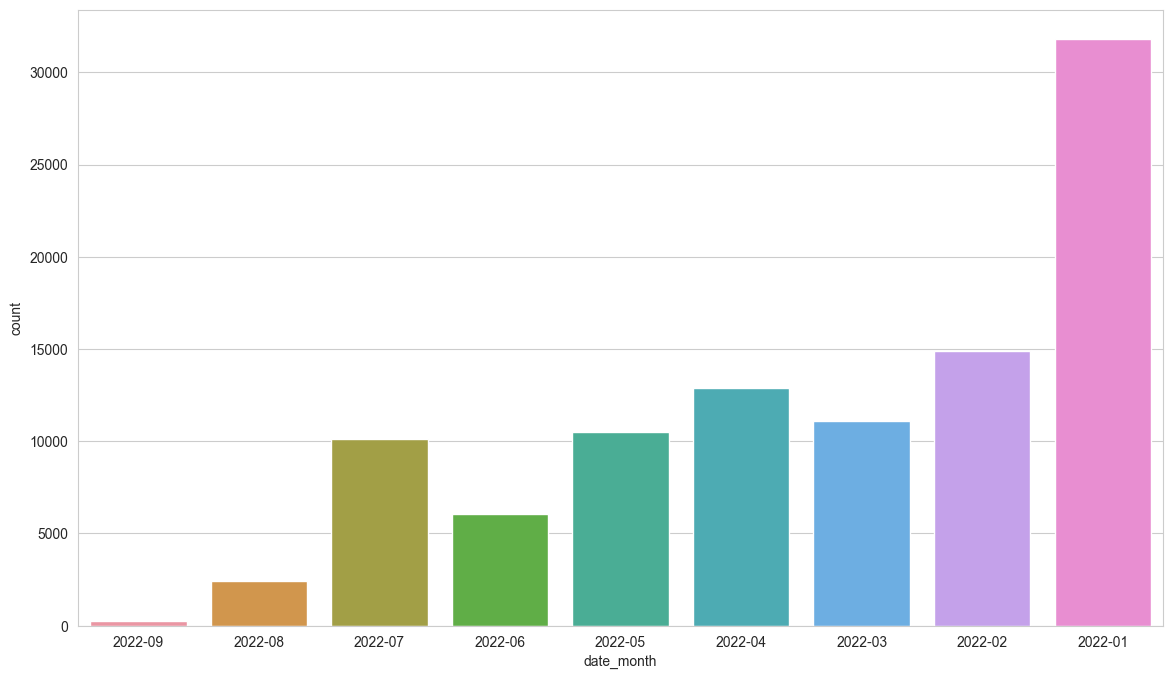

In [106]:
# basic plot de datos
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x='date_month', data=dataset_mencion1, ax=ax)
plt.show()

In [ ]:
# analisis de sentimiento
dataset_mencion1['sentiment'] = dataset_mencion1['rawContent'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [108]:
dataset_mencion1[dataset_mencion1['sentiment'] != 0][['rawContent', 'sentiment']]

,rawContent,sentiment
19,El proceso que da lugar al #PlebiscitoChile in...,0.033333
53,La salida civilizada a la crisis política post...,0.041667
65,@Mister_Wolf_0 @gonzalofeito Me parece terribl...,-1.000000
91,""" los principios del radicalismo -que siempre...",-0.800000
94,La forma ideal de evitar/impedir cambios estru...,0.900000
...,...,...
99848,Hicimos bolsa al frente amplio pa q se avispar...,1.000000
99861,Qué sucede con #ConvencionConstitucional !! es...,0.333333
99866,Que terrible que voten por alguien como Patric...,-1.000000
99912,Patricio Fernández? seriously? #ConvencionCons...,-0.333333


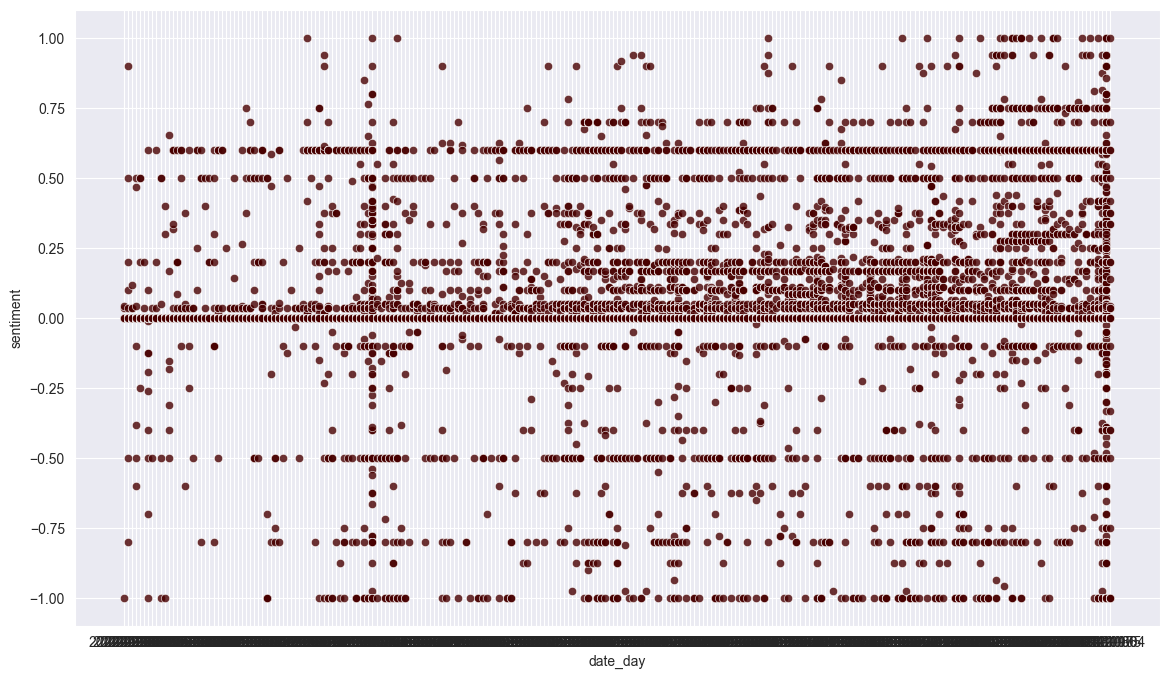

In [96]:
# plot sentimiento
fig, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(x='date_day', y='sentiment', data=dataset_mencion1, ax=ax, alpha=0.8)
plt.show()

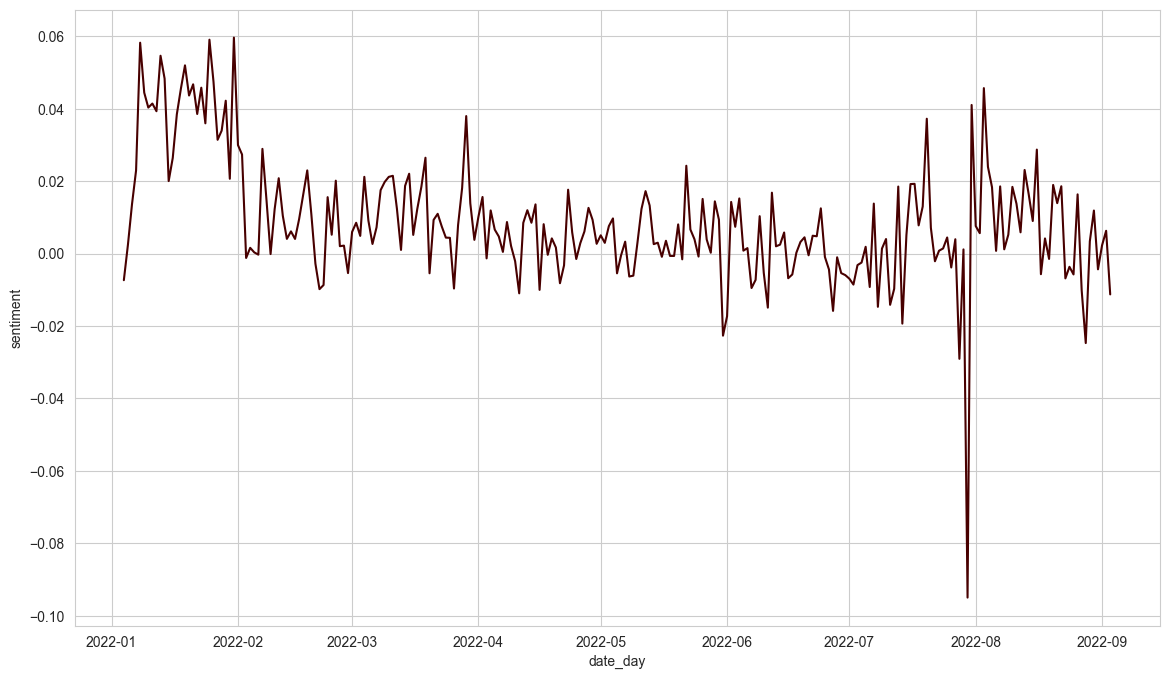

In [110]:
# plot sentimiento
avg_day = dataset_mencion1[['date_day', 'sentiment']].groupby('date_day').mean()

fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x=avg_day.index, y='sentiment', data=avg_day, ax=ax)
plt.show()